In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#get density field
with h5py.File('coord_ana.h5','r') as anafile:
    phi=np.array(anafile['density_field'])
    delta_mc_phi=np.array(anafile['density_field'].attrs["DeltaMC"])
    MSD=np.array(anafile['MSD'])

In [3]:
with h5py.File('coord.h5', 'r') as f:
    ##number of beads per polymer
    N=int(f['parameter/reference_Nbeads'][()]) 
    ##number of polymers
    n_polym=int(f['parameter/n_polymers'][()]) 
    n_poly_type=int(f['parameter/n_poly_type'][()]) 
    ##box dimensions 
    lxyz=np.array(f['parameter/lxyz'])
    ##box discretization
    nxyz=np.array(f['parameter/nxyz'])


In [4]:
scale=np.prod(nxyz)/(N*n_polym)
phi=phi*scale
rho0=n_polym*N/(np.prod(lxyz))

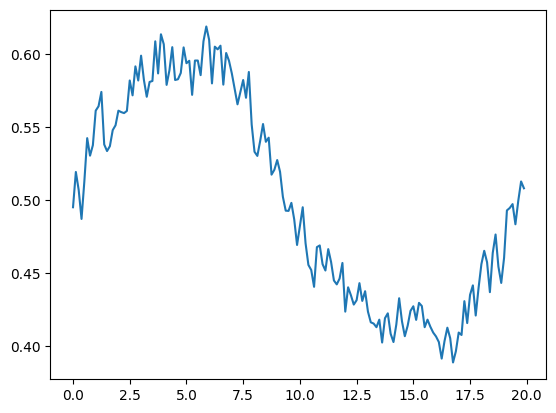

In [5]:

num_steps=len(phi) #number of MC sweeps
tmax=num_steps*delta_mc_phi
t=np.arange(0,tmax,delta_mc_phi)
x_grid=np.arange(0,nxyz[0],1)*lxyz[0]/nxyz[0]
phiA=phi.mean(axis=(3,4))[:,0]
phiB=phi.mean(axis=(3,4))[:,1]
plt.plot(x_grid,phiA[30])

In [6]:
#diffusion constant
MSDA=MSD[:,3]
DA=MSD[:,3][-1]/(6*tmax)
DA

0.00012140170909011002

In [7]:
##get diffusion constant from decaying fourier mode
D=-1/(10*delta_mc_phi*(2*np.pi/lxyz[0])**2)*np.log(np.max(phiA[20])/np.max(phiA[10]))
D

3.588359754469276e-05